In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
powerlifting = pd.read_csv('./Data/powerlifting_clean.csv')

/opt/conda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (11,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
powerlifting['SexBinary'] = powerlifting.Sex.apply(lambda x: 1 if x == 'F' else 0)

In [5]:
powerlifting['EquipmentBinary'] = powerlifting.Equipment.apply(lambda x: 0 if x == 'Raw' else 1)

In [6]:
clean_mask = (powerlifting['Age'].isnull()==False) & (powerlifting['TotalKg'].isnull()==False)
cleaned = powerlifting.loc[clean_mask]
cleaned.to_csv('./Data/cleaned_for_modeling')

In [7]:
cleaned = pd.read_csv('./Data/cleaned_for_modeling')

/opt/conda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (12,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
X = cleaned[['BodyweightKg', 'Age', 'SexBinary', 'EquipmentBinary']]
y = cleaned['TotalKg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [9]:
en = ElasticNet(alpha=0.1, l1_ratio=1)

**note:** originally I GridSearched all my models, however they all came back with the same values for alpha and l1_ratio, so for the purpose of readability I have simply fit my models with the optimal values selected by the GridSearch. 
<p>Work in it's entirety may be found <a href="https://git.generalassemb.ly/sophiazwilson/powerlifting-project/blob/master/OtherNotebooks/Regressions.ipynb"><b>here</b></a>

In [10]:
en.fit(X_train, y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [11]:
en.score(X_test, y_test)

0.62510520959938687

In [12]:
predictions = en.predict(X)
cleaned['predictions'] = predictions

In [13]:
residuals = cleaned['TotalKg'].values - cleaned['predictions'].values 
cleaned['residuals'] = residuals

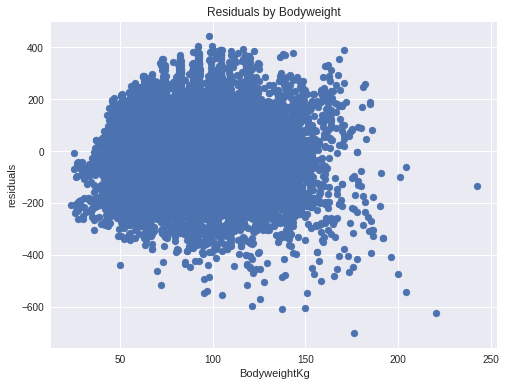

In [14]:
plt.figure(figsize = (8, 6))
plt.scatter(cleaned['BodyweightKg'], cleaned['residuals'])
plt.title('Residuals by Bodyweight')
plt.xlabel('BodyweightKg')
plt.ylabel('residuals')
plt.show()

In [15]:
np.corrcoef(cleaned['BodyweightKg'], cleaned['residuals'])

array([[ 1.        , -0.00132156],
       [-0.00132156,  1.        ]])

In [16]:
list(zip(X.columns, en.coef_))

[('BodyweightKg', 3.3966517750294352),
 ('Age', -0.26869721012582531),
 ('SexBinary', -167.52841129257257),
 ('EquipmentBinary', 76.843652380243171)]

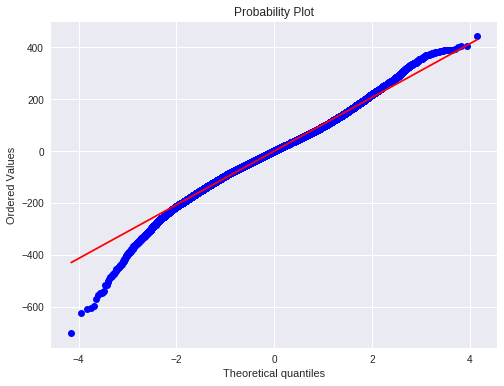

In [17]:
import scipy.stats as stats 
plt.figure(figsize=(8, 6))
stats.probplot(cleaned['residuals'], dist="norm", plot=plt)
plt.show()

In [18]:
cleaned.sort_values('residuals', ascending = True).head(10)

,Unnamed: 0,Unnamed: 0.1,Age,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,BestBenchKg,BestDeadliftKg,BestSquatKg,...,Team,TotalKg,WeightClassKg,Wilks,Year,calcWilks,SexBinary,EquipmentBinary,predictions,residuals
27850,48779,48972,58.000000,NaN,NaN,NaN,NaN,25.0,65.0,25.0,...,NaN,115.0,120+,NaN,2017,62.114005,0,0,817.096770,-702.096770
24931,44041,44228,33.000000,105.0,110.0,-117.5,NaN,110.0,130.0,107.5,...,NaN,347.5,120+,NaN,2017,188.188426,0,0,973.946208,-626.446208
8335,15087,15156,56.666667,NaN,NaN,NaN,NaN,25.0,25.0,25.0,...,NaN,75.0,125+,NaN,2014,42.030356,0,0,686.344274,-611.344274
14718,27027,27142,46.000000,25.0,NaN,NaN,NaN,25.0,75.0,25.0,...,South Carolina,125.0,120+,NaN,2017,69.174918,0,0,731.328860,-606.328860
5122,8638,8671,71.500000,20.0,NaN,NaN,NaN,20.0,65.0,20.0,...,NaN,105.0,125,NaN,2014,60.252109,0,1,703.497162,-598.497162
9178,16511,16582,51.888889,NaN,NaN,NaN,NaN,25.0,25.0,25.0,...,NaN,75.0,125+,NaN,2014,42.697148,0,0,647.547559,-572.547559
32087,56397,56606,18.000000,29.5,31.8,36.3,NaN,36.3,36.3,34.0,...,NaN,106.6,105,NaN,2017,63.720535,0,1,663.186369,-556.586369
12189,22070,22157,43.500000,NaN,NaN,NaN,NaN,25.0,25.0,25.0,...,NaN,75.0,105,NaN,2014,46.542154,0,1,624.406064,-549.406064
3829,6015,6039,14.000000,37.5,42.5,45.0,NaN,45.0,112.5,37.5,...,NaN,195.0,120+,NaN,2017,107.801778,0,0,743.663487,-548.663487
18421,33100,33248,19.000000,-102.5,112.5,-127.5,NaN,112.5,150.0,117.5,...,NaN,380.0,120+,NaN,2016,202.003448,0,0,922.682211,-542.682211


In [19]:
cleaned.sort_values('residuals', ascending = False).head(10)

,Unnamed: 0,Unnamed: 0.1,Age,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,BestBenchKg,BestDeadliftKg,BestSquatKg,...,Team,TotalKg,WeightClassKg,Wilks,Year,calcWilks,SexBinary,EquipmentBinary,predictions,residuals
38403,70177,71219,27.0,285.0,295.0,297.5,NaN,297.5,375.0,407.5,...,NaN,1080.0,105,NaN,2017,662.429463,0,1,637.704829,442.295171
40973,73136,74194,29.0,280.0,292.0,295.0,NaN,295.0,367.5,385.0,...,NaN,1047.5,100,NaN,2010,638.835313,0,1,641.820847,405.679153
38319,69784,70781,25.0,-280.0,280.0,285.0,NaN,285.0,350.0,387.5,...,NaN,1022.5,93,NaN,2015,645.156245,0,1,617.998179,404.501821
38320,69785,70782,28.0,277.5,287.5,-292.5,NaN,287.5,350.0,380.0,...,NaN,1017.5,93,NaN,2015,642.305393,0,1,616.886388,400.613612
38356,69823,70820,30.0,300.0,312.5,317.5,NaN,317.5,362.5,415.0,...,NaN,1095.0,120,NaN,2015,633.988348,0,1,699.634896,395.365104
40740,72762,73819,40.0,255.0,260.0,-262.5,NaN,260.0,387.5,400.0,...,NaN,1047.5,105,NaN,2012,627.228615,0,1,655.542738,391.957262
40338,72290,73342,31.0,NaN,NaN,NaN,NaN,235.0,377.5,423.0,...,NaN,1035.0,100,NaN,1994,629.889689,0,1,643.049712,391.950288
40057,71909,72951,27.0,310.0,-320.0,320.0,NaN,320.0,320.0,410.0,...,NaN,1050.0,105,NaN,2014,629.221757,0,1,658.254572,391.745428
41929,74352,75432,26.0,310.0,323.0,-327.5,NaN,323.0,325.0,402.5,...,NaN,1050.5,105,NaN,2013,627.898072,0,1,661.104725,389.395275
16617,30101,30242,30.0,205.0,365.0,410.0,NaN,410.0,357.5,505.0,...,USA,1272.5,120+,NaN,2017,690.709052,0,1,883.393757,389.106243


In [20]:
# refit the model using bodyweight ^ 2/3 instead of bodyweight

cleaned['BodyweightKg_twothirds'] = cleaned['BodyweightKg'].apply(lambda x: x**(2/3))

In [21]:
X2 = cleaned[['BodyweightKg_twothirds', 'Age', 'SexBinary', 'EquipmentBinary']]
y2 = cleaned['TotalKg']

In [22]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=4)

In [23]:
en2 = ElasticNet(alpha=0.1, l1_ratio=1)
en2.fit(X2_train, y2_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [24]:
en2.score(X2_test, y2_test)

0.62771398992359451

In [25]:
list(zip(X2.columns, en2.coef_))

[('BodyweightKg_twothirds', 22.834015442062036),
 ('Age', -0.29655568078786743),
 ('SexBinary', -164.47074288001181),
 ('EquipmentBinary', 77.632422597596857)]

In [26]:
predictionsb = en2.predict(X2)
cleaned['predictionsb'] = predictionsb
residualsb = cleaned['TotalKg'].values - cleaned['predictionsb'].values 
cleaned['residualsb'] = residualsb

In [27]:
np.corrcoef(cleaned['BodyweightKg'], cleaned['residualsb'])

array([[ 1.        , -0.00432741],
       [-0.00432741,  1.        ]])

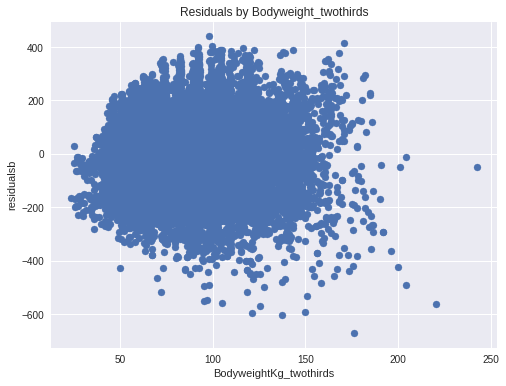

In [28]:
plt.figure(figsize = (8, 6))
plt.scatter(cleaned['BodyweightKg'], cleaned['residualsb'])
plt.title('Residuals by Bodyweight_twothirds')
plt.xlabel('BodyweightKg_twothirds')
plt.ylabel('residualsb')
plt.show()

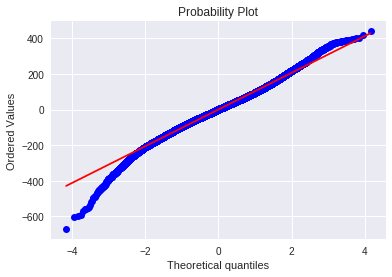

In [29]:
stats.probplot(cleaned['residualsb'], dist="norm", plot=plt)

plt.show()

In [30]:
cleaned[['Age', 'Sex', 'BodyweightKg', 'TotalKg', 'EquipmentBinary', 'predictions', 'predictionsb', 'residuals', 'residualsb']].sort_values('residualsb', ascending=True).head(10)

,Age,Sex,BodyweightKg,TotalKg,EquipmentBinary,predictions,predictionsb,residuals,residualsb
27850,58.000000,M,176.0,115.0,0,817.096770,785.247887,-702.096770,-670.247887
8335,56.666667,M,137.4,75.0,0,686.344274,676.529589,-611.344274,-601.529589
5122,71.500000,M,121.0,105.0,1,703.497162,700.364976,-598.497162,-595.364976
14718,46.000000,M,149.8,125.0,0,731.328860,715.744176,-606.328860,-590.744176
9178,51.888889,M,125.6,75.0,0,647.547559,642.617636,-572.547559,-567.617636
24931,33.000000,M,220.2,347.5,0,973.946208,908.189786,-626.446208,-560.689786
32087,18.000000,M,104.9,106.6,1,663.186369,665.510010,-556.586369,-558.910010
12189,43.500000,M,95.5,75.0,1,624.406064,627.134852,-549.406064,-552.134852
28866,15.162791,M,96.9,95.0,1,636.775505,640.189585,-541.775505,-545.189585
3829,14.000000,M,150.9,195.0,0,743.663487,728.383032,-548.663487,-533.383032


In [31]:
cleaned[['Age', 'Sex', 'BodyweightKg', 'TotalKg', 'EquipmentBinary','WeightClassKg', 'predictions', 'predictionsb', 'residuals', 'residualsb']].sort_values('residuals', ascending=False).head(10)

,Age,Sex,BodyweightKg,TotalKg,EquipmentBinary,WeightClassKg,predictions,predictionsb,residuals,residualsb
38403,27.0,M,98.11,1080.0,1,105,637.704829,640.681116,442.295171,439.318884
40973,29.0,M,99.48,1047.5,1,100,641.820847,644.599302,405.679153,402.900698
38319,25.0,M,92.15,1022.5,1,93,617.998179,621.398194,404.501821,401.101806
38320,28.0,M,92.06,1017.5,1,93,616.886388,620.205157,400.613612,397.294843
38356,30.0,M,116.58,1095.0,1,120,699.634896,698.984316,395.365104,396.015684
40740,40.0,M,104.39,1047.5,1,105,655.542738,657.338298,391.957262,390.161702
40338,31.0,M,100.00,1035.0,1,100,643.049712,645.713078,391.950288,389.286922
40057,27.0,M,104.16,1050.0,1,105,658.254572,660.449660,391.745428,389.550340
41929,26.0,M,104.92,1050.5,1,105,661.104725,663.202117,389.395275,387.297883
16617,30.0,M,170.68,1272.5,1,120+,883.393757,856.659052,389.106243,415.840948


In [32]:
display (cleaned.groupby('SexBinary').min()['residualsb'])
display (cleaned.groupby('SexBinary').min()['residuals'])

SexBinary
0   -670.247887
1   -418.341067
Name: residualsb, dtype: float64

SexBinary
0   -702.096770
1   -445.719724
Name: residuals, dtype: float64

In [33]:
display (cleaned.groupby('SexBinary').max()['residualsb'])
display (cleaned.groupby('SexBinary').max()['residuals'])

SexBinary
0    439.318884
1    290.611027
Name: residualsb, dtype: float64

SexBinary
0    442.295171
1    291.289029
Name: residuals, dtype: float64

In [34]:
cleaned.groupby(['SexBinary', 'EquipmentBinary']).max()['residualsb']

SexBinary  EquipmentBinary
0          0                  379.137034
           1                  439.318884
1          0                  233.906088
           1                  290.611027
Name: residualsb, dtype: float64

Women are getting eclipsed by men on both sides in the equation as it stands now. There are two things that could be done to fix this: either add interaction terms (so gender * other features), or split up men and women and find separate sets of coefficients. I have decided to separate out men and women for a few reasons. They are as follows:
- every added feature is added complexity to the formula we are predicting. Although I don't anticipate this formula being adopted any time soon, I still intend to build something that is easy to understand/implement. 
- Wilks score has separate coefficient values for men and women, maybe I don't need to completely break the wheel here.
- it really seems like there is something non-linear about men and women's relative strength, that can't be measured by simply turning on/off a value.

I will also try to capture the age-total relationship (seems non-linear as well) and add a column for super heavyweights. 

In [35]:
is_SHW = []
for row in cleaned.iterrows():
    if (row[1]['BodyweightKg'] > 84 and row[1]['SexBinary'] == 1) or (row[1]['BodyweightKg'] > 120 and row[1]['SexBinary'] == 0):
        is_SHW.append(1)
    else:
        is_SHW.append(0)

In [36]:
cleaned['is_SHW'] = is_SHW

Created a polynomial feature for Age

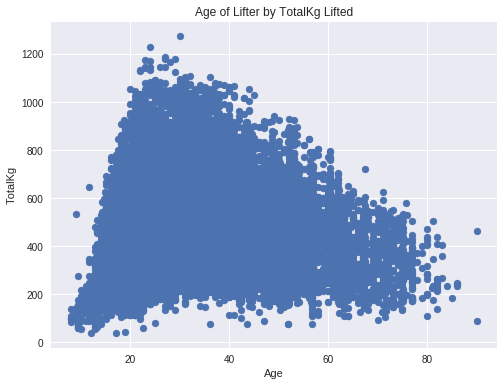

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(cleaned['Age'], cleaned['TotalKg'])
plt.title('Age of Lifter by TotalKg Lifted')
plt.xlabel('Age')
plt.ylabel('TotalKg')
plt.show()

In [38]:
cleaned['Age_squared'] = cleaned.Age.apply(lambda x: x**2)

create interaction terms between Bodyweight and Equipment (since there is such a strong relationship between Bodyweight and Weight lifted- it is possible that Equipment doesn't uniformly increase total across Bodyweights)

In [39]:
cleaned['BW/E'] = cleaned['BodyweightKg'].values * cleaned['EquipmentBinary'].values

In [40]:
cleaned['allo_BW/E'] = cleaned['BodyweightKg_twothirds'].values * cleaned['EquipmentBinary'].values

# Fit Separate Models for Men and Women

In [41]:
# separate data into men and women:
men = cleaned.loc[(cleaned['SexBinary'] == 0)]
women = cleaned.loc[(cleaned['SexBinary'] == 1)]

In [42]:
# fit model for men 

Xm = men[['BodyweightKg_twothirds', 'Age', 'Age_squared', 'allo_BW/E', 'is_SHW', 'EquipmentBinary']]
ym = men['TotalKg']

In [43]:
X_trainm, X_testm, y_trainm, y_testm = train_test_split(Xm, ym, random_state = 42)

In [44]:
enm = ElasticNet(alpha=0.1, l1_ratio=1)
enm.fit(X_trainm, y_trainm)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [45]:
enm.score(X_testm, y_testm)

0.51173351305283221

In [46]:
list(zip(Xm.columns, enm.coef_))

[('BodyweightKg_twothirds', 24.819642664441549),
 ('Age', 18.375655797857871),
 ('Age_squared', -0.24762272236734317),
 ('allo_BW/E', 5.013117669922492),
 ('is_SHW', -65.217066306031171),
 ('EquipmentBinary', -1.5166181769880269)]

In [47]:
enm.intercept_

-241.26077341718769

In [48]:
Xw = women[['BodyweightKg_twothirds', 'Age', 'Age_squared', 'allo_BW/E', 'is_SHW', 'EquipmentBinary']]
yw = women['TotalKg']

X_trainw, X_testw, y_trainw, y_testw = train_test_split(Xw, yw, random_state = 42)

enw = ElasticNet(alpha=0.1, l1_ratio=1)
enw.fit(X_trainw, y_trainw)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [49]:
enw.score(X_testw, y_testw)

0.41210756620556621

In [50]:
list(zip(Xw.columns, enw.coef_))

[('BodyweightKg_twothirds', 13.130379588213943),
 ('Age', 12.031817623963024),
 ('Age_squared', -0.16316063594572747),
 ('allo_BW/E', 4.7812144520561679),
 ('is_SHW', -35.523196813132181),
 ('EquipmentBinary', -0.0)]

In [51]:
enw.intercept_

-107.16120055597577

# Validation - EDA

In [52]:
# get predictions and residuals for men + women

predictions_m = enm.predict(Xm)
predictions_w = enw.predict(Xw)

residuals_m = men['TotalKg'].values - predictions_m
residuals_w = women['TotalKg'].values - predictions_w

men['residuals'] = residuals_m
women['residuals'] = residuals_w

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [99]:
cleaned[['Age', 'Sex', 'BodyweightKg', 'TotalKg', 'EquipmentBinary',\
         'WeightClassKg', 'predictions', 'residuals',]].sort_values('residuals', ascending=True).head(10)

,Age,Sex,BodyweightKg,TotalKg,EquipmentBinary,WeightClassKg,predictions,residuals
27850,58.000000,M,176.0,115.0,0,120+,817.096770,-702.096770
24931,33.000000,M,220.2,347.5,0,120+,973.946208,-626.446208
8335,56.666667,M,137.4,75.0,0,125+,686.344274,-611.344274
14718,46.000000,M,149.8,125.0,0,120+,731.328860,-606.328860
5122,71.500000,M,121.0,105.0,1,125,703.497162,-598.497162
9178,51.888889,M,125.6,75.0,0,125+,647.547559,-572.547559
32087,18.000000,M,104.9,106.6,1,105,663.186369,-556.586369
12189,43.500000,M,95.5,75.0,1,105,624.406064,-549.406064
3829,14.000000,M,150.9,195.0,0,120+,743.663487,-548.663487
18421,19.000000,M,204.0,380.0,0,120+,922.682211,-542.682211


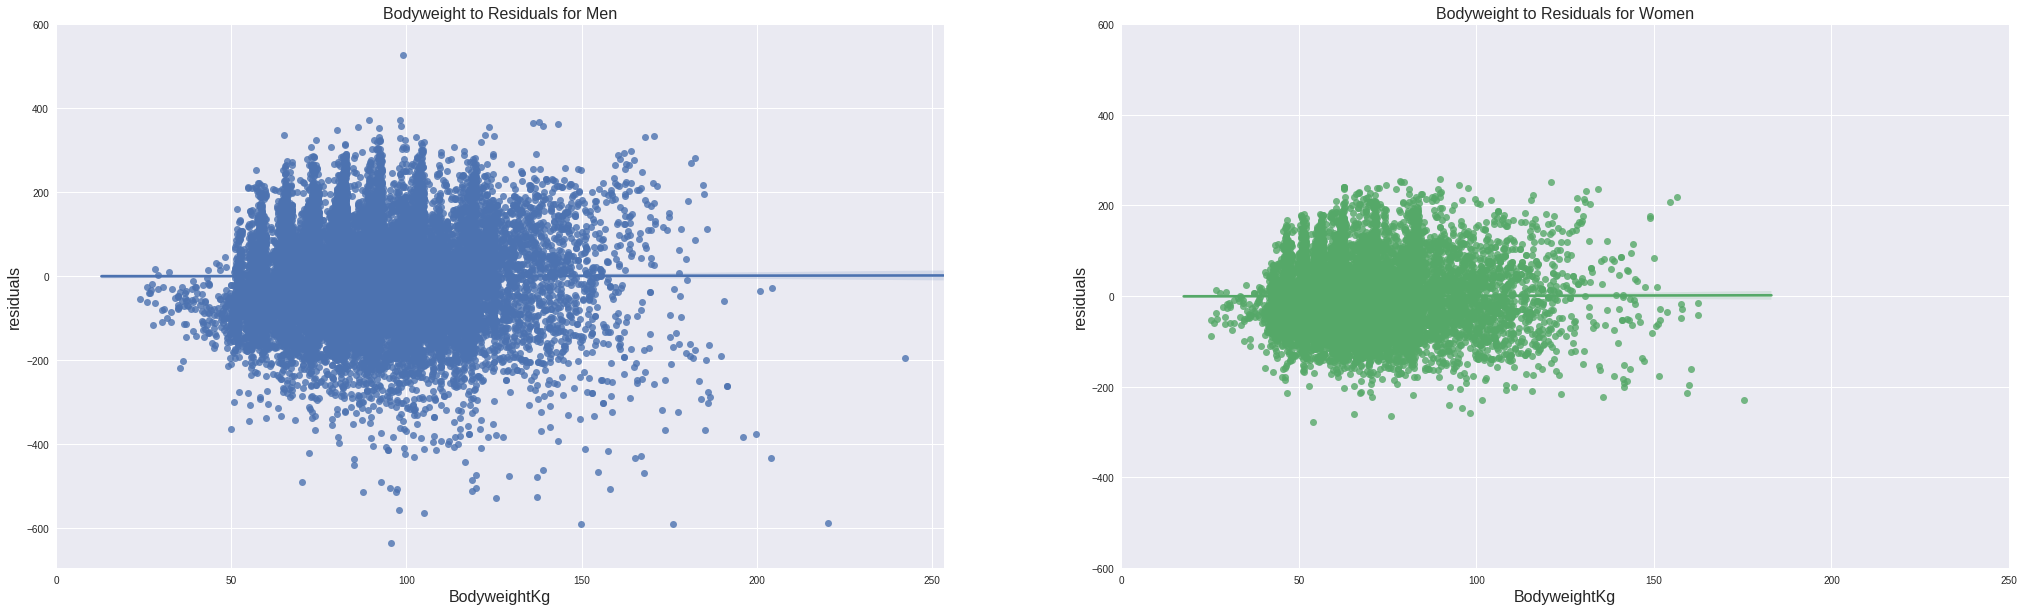

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(35, 10))

sns.regplot(men['BodyweightKg'], men['residuals'], ax=axes[0])
sns.regplot(women['BodyweightKg'], women['residuals'], ax=axes[1])
axes[0].set_title('Bodyweight to Residuals for Men')
axes[1].set_title('Bodyweight to Residuals for Women')
for ax in axes:
    plt.sca(ax)
    plt.yticks([-600, -400, -200, 0, 200, 400, 600])
    plt.xticks([0, 50, 100, 150, 200, 250])
    ax.title.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    ax.xaxis.label.set_fontsize(16)
plt.show()

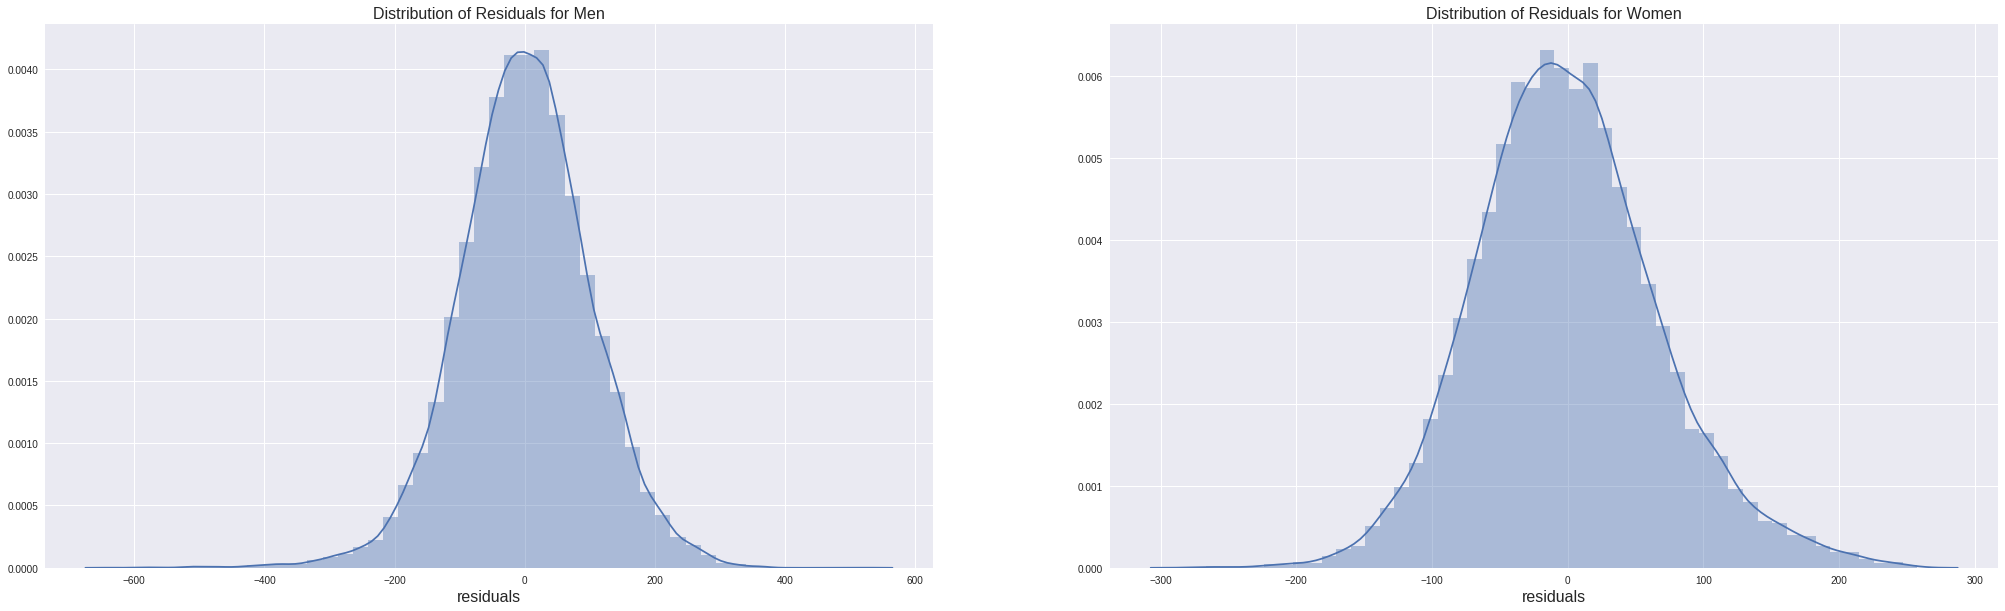

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(35, 10))

sns.distplot(men['residuals'], ax=axes[0])
sns.distplot(women['residuals'], ax=axes[1])
axes[0].set_title('Distribution of Residuals for Men')
axes[1].set_title('Distribution of Residuals for Women')
for ax in axes:
    plt.sca(ax)
    ax.title.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    ax.xaxis.label.set_fontsize(16)
plt.show()

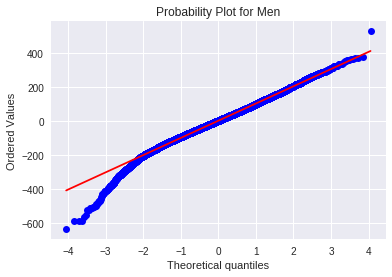

In [65]:
# probability plot for men's residuals (compared to a normal distribution)
stats.probplot(men['residuals'], dist="norm", plot=plt)
plt.title('Probability Plot for Men')
plt.show()

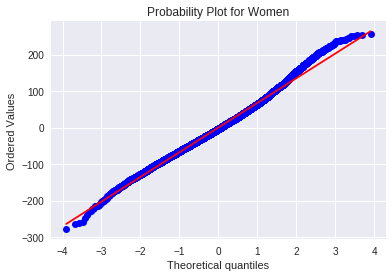

In [66]:
# probability plot for women's residuals (compared to a normal distribution)
stats.probplot(women['residuals'], dist="norm", plot=plt)
plt.title('Probability Plot for Women')
plt.show()

In [67]:
men['predictions'] = predictions_m
women['predictions'] = predictions_w

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [68]:
men[['Age', 'Sex', 'BodyweightKg', 'TotalKg', 'EquipmentBinary','WeightClassKg', 'predictions','residuals']].sort_values('residuals', ascending=False).head(10)

,Age,Sex,BodyweightKg,TotalKg,EquipmentBinary,WeightClassKg,predictions,residuals
734,90.000000,M,99.10,465.0,0,105,-61.685981,526.685981
38403,27.000000,M,98.11,1080.0,1,105,707.451597,372.548403
21166,22.462372,M,89.30,914.0,0,90,542.424644,371.575356
40771,23.000000,M,137.94,1147.5,1,120+,780.094165,367.405835
37162,22.000000,M,136.20,1130.0,1,120+,766.149738,363.850262
41957,24.000000,M,143.20,1170.0,1,120+,806.951877,363.048123
750,81.250000,M,98.60,505.0,0,105,146.784907,358.215093
40329,24.000000,M,138.92,1147.5,1,NaN,790.599330,356.900670
18499,82.000000,M,86.10,440.0,0,93,84.474620,355.525380
40613,20.000000,M,123.56,1055.0,1,125,700.549633,354.450367


In [69]:
men[['Age', 'Sex', 'BodyweightKg', 'TotalKg', 'EquipmentBinary','WeightClassKg', 'predictions','residuals']].sort_values('residuals', ascending=True).head(10)

,Age,Sex,BodyweightKg,TotalKg,EquipmentBinary,WeightClassKg,predictions,residuals
12189,43.500000,M,95.5,75.0,1,105,711.297473,-636.297473
27850,58.000000,M,176.0,115.0,0,120+,705.785552,-590.785552
14718,46.000000,M,149.8,125.0,0,120+,714.895016,-589.895016
24931,33.000000,M,220.2,347.5,0,120+,935.310078,-587.810078
32087,18.000000,M,104.9,106.6,1,105,671.309913,-564.709913
32086,27.000000,M,98.0,149.7,1,105,706.977168,-557.277168
9178,51.888889,M,125.6,75.0,0,125+,602.776095,-527.776095
8335,56.666667,M,137.4,75.0,0,125+,600.541296,-525.541296
33491,36.000000,M,87.6,75.0,0,90,588.895148,-513.895148
28866,15.162791,M,96.9,95.0,1,105,608.292550,-513.292550


In [70]:
women[['Age', 'Sex', 'BodyweightKg', 'TotalKg', 'EquipmentBinary','WeightClassKg', 'predictions','residuals']].sort_values('residuals', ascending=False).head(10)

,Age,Sex,BodyweightKg,TotalKg,EquipmentBinary,WeightClassKg,predictions,residuals
41081,27.0,F,89.76,680.0,1,90,422.309128,257.690872
36655,24.0,F,78.62,670.5,1,84,416.339476,254.160524
37039,22.0,F,78.89,660.5,1,84,408.038786,252.461214
41612,21.0,F,79.69,657.5,1,84,405.246498,252.253502
40490,27.0,F,120.95,753.0,1,84+,501.295168,251.704832
33090,27.0,F,95.10,682.5,1,90+,436.413057,246.086943
40277,19.0,F,74.52,625.0,1,75,379.729897,245.270103
36637,36.0,F,62.62,638.5,1,63,396.978939,241.521061
40460,35.0,F,62.84,638.0,1,63,397.192688,240.807312
40795,35.0,F,62.60,636.0,1,NaN,396.471383,239.528617


In [71]:
women[['Age', 'Sex', 'BodyweightKg', 'TotalKg', 'EquipmentBinary','WeightClassKg', 'predictions','residuals']].sort_values('residuals', ascending=True).head(10)

,Age,Sex,BodyweightKg,TotalKg,EquipmentBinary,WeightClassKg,predictions,residuals
32040,19.000000,F,53.97,40.8,1,57,318.343509,-277.543509
6099,18.711864,F,76.10,117.5,1,84,382.503748,-265.003748
38002,29.000000,F,65.42,135.0,1,72,395.352474,-260.352474
4670,48.571429,F,98.30,180.0,1,90+,438.299913,-258.299913
31633,43.500000,F,96.00,200.0,1,NaN,447.492203,-247.492203
27674,21.840278,F,92.40,167.9,1,90+,408.351828,-240.451828
14454,20.000000,F,101.60,192.5,1,84+,422.686595,-230.186595
22962,19.481953,F,175.50,212.5,0,84+,441.379222,-228.879222
34633,41.500000,F,135.71,325.0,1,90+,548.648237,-223.648237
17306,50.989583,F,70.70,165.0,1,72,388.381807,-223.381807


In [72]:
men[['Age', 'Sex', 'BodyweightKg', \
     'TotalKg', 'EquipmentBinary',\
     'WeightClassKg', 'predictions','residuals']].sort_values('predictions', ascending=True).head(10)

,Age,Sex,BodyweightKg,TotalKg,EquipmentBinary,WeightClassKg,predictions,residuals
121,86.0,M,65.20,245.0,0,66,-90.309203,335.309203
734,90.0,M,99.10,465.0,0,105,-61.685981,526.685981
7000,82.0,M,57.20,222.5,0,59,-31.010037,253.510037
7002,86.0,M,80.60,242.5,0,83,-29.260543,271.760543
13194,86.0,M,81.10,235.0,0,83,-27.347252,262.347252
39094,82.0,M,72.45,265.0,0,74,31.869191,233.130809
7001,82.0,M,73.00,250.0,0,74,34.049441,215.950559
27839,80.0,M,63.20,200.0,0,66,37.804331,162.195669
33428,84.0,M,66.20,235.0,1,67.5,41.752880,193.247120
24538,82.0,M,76.30,262.5,0,83,47.017968,215.482032


In [73]:
women[['Age', 'Sex', 'BodyweightKg', \
     'TotalKg', 'EquipmentBinary',\
     'WeightClassKg', 'predictions','residuals']].sort_values('predictions', ascending=True).head(10)

,Age,Sex,BodyweightKg,TotalKg,EquipmentBinary,WeightClassKg,predictions,residuals
22713,90.000000,F,71.34,90.0,0,72,-120.042218,210.042218
14612,85.000000,F,89.80,182.5,0,84+,-35.509039,218.009039
39437,75.000000,F,46.77,215.0,0,47,47.893348,167.106652
26901,74.818182,F,47.80,207.5,0,52,52.643552,154.856448
14906,80.000000,F,99.00,195.0,0,84+,56.629335,138.370665
39440,75.000000,F,52.15,180.0,0,57,60.725875,119.274125
26902,74.818182,F,52.00,177.5,0,52,62.631098,114.868902
36950,74.000000,F,51.24,160.0,0,52,70.866634,89.133366
37503,73.000000,F,46.42,222.5,0,47,71.273845,151.226155
36952,77.000000,F,70.20,170.0,0,72,75.353342,94.646658


so we're getting negative predictions for both men and women who are 80 and older, this is something to fix in the model

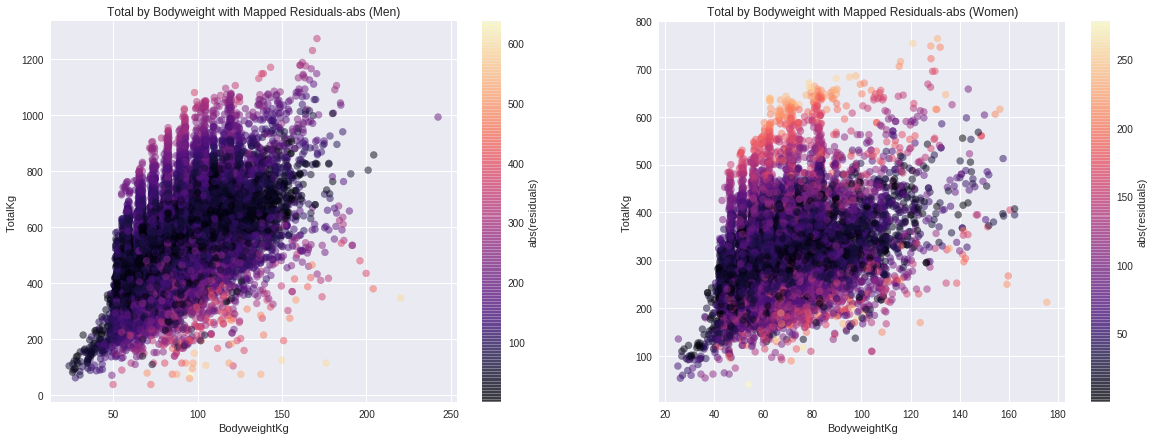

In [74]:
# plot TotalKg by Bodyweight and map the absolute value of the residuals
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

m = axes[0].scatter(men['BodyweightKg'], men['TotalKg'], c=abs(men['residuals']), cmap='magma', alpha=.5)
cbar1 = plt.colorbar(mappable=m, ax=axes[0])
cbar1.set_label('abs(residuals)')
axes[0].set_xlabel('BodyweightKg')
axes[0].set_ylabel('TotalKg')
axes[0].set_title('Total by Bodyweight with Mapped Residuals-abs (Men)')

w = axes[1].scatter(women['BodyweightKg'], women['TotalKg'], c=abs(women['residuals']), cmap='magma', alpha=.5)
cbar2 = plt.colorbar(mappable=w)
cbar2.set_label('abs(residuals)')
axes[1].set_xlabel('BodyweightKg')
axes[1].set_ylabel('TotalKg')
axes[1].set_title('Total by Bodyweight with Mapped Residuals-abs (Women)')

plt.show()

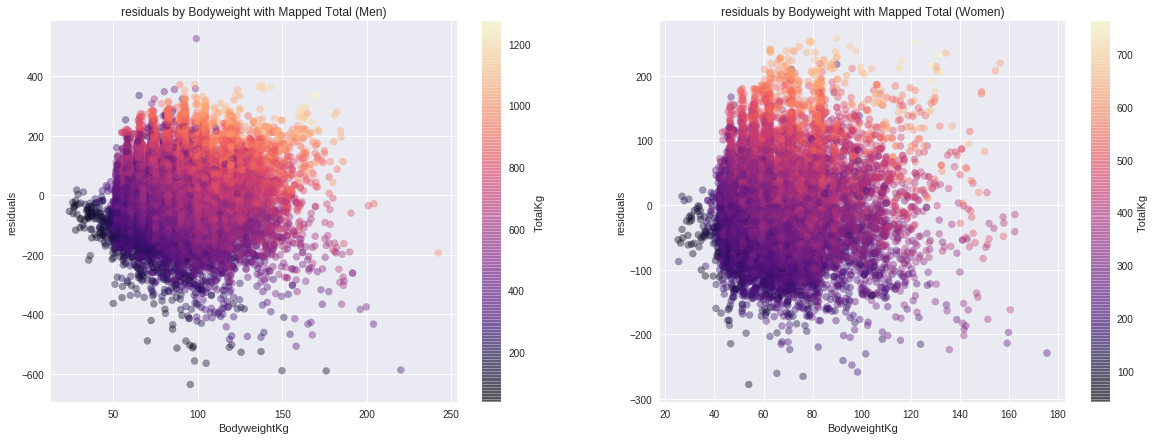

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

m = axes[0].scatter(men['BodyweightKg'], men['residuals'], c=men['TotalKg'], cmap='magma', alpha=.4)
cbar1 = plt.colorbar(mappable=m, ax=axes[0])
cbar1.set_label('TotalKg')
axes[0].set_xlabel('BodyweightKg')
axes[0].set_ylabel('residuals')
axes[0].set_title('residuals by Bodyweight with Mapped Total (Men)')

w = axes[1].scatter(women['BodyweightKg'], women['residuals'], c=women['TotalKg'], cmap='magma', alpha=.4)
cbar2 = plt.colorbar(mappable=w)
cbar2.set_label('TotalKg')
axes[1].set_xlabel('BodyweightKg')
axes[1].set_ylabel('residuals')
axes[1].set_title('residuals by Bodyweight with Mapped Total (Women)')

plt.show()

# Validation - Meet Simulation

next thing to do to try and see if the model is fair is to simulate meets and then check if any weight class wins more frequently than the others, we will do this by taking samples of 40 (usually about the size of a meet) and then selecting the winner based on highest Residual Score. we will then append that winners info into a dataframe

In [76]:
# simulate (10,000) meets

# set dictionaries for residuals
best_lifter_dic_w = {}
best_lifter_dic_m = {}
# set dictionaries for wilks
best_lifter_dic_w_wilks = {}
best_lifter_dic_m_wilks = {}

for i in range(10000):
    meet_w = women.sample(40, random_state=i)
    meet_m = men.sample(40, random_state=i)
    winner_w = meet_w.sort_values('residuals', ascending=False).head(1)
    winner_m = meet_m.sort_values('residuals', ascending=False).head(1)
    meet_w_wilks = women.sample(40, random_state=i)
    meet_m_wilks = men.sample(40, random_state=i)
    winner_w_wilks = meet_w_wilks.sort_values('calcWilks', ascending=False).head(1)
    winner_m_wilks = meet_m_wilks.sort_values('calcWilks', ascending=False).head(1)
    
    for row in winner_w.iterrows():
        best_lifter_dic_w['meet{}'.format(i)] = {
            'BodyweightKg': row[1]['BodyweightKg'],
            'TotalKg':  row[1]['TotalKg'],
            'residual': row[1]['residuals'],
            'Age': row[1]['Age'],
            'Equipment': row[1]['Equipment'],
            'Wilks': row[1]['calcWilks']
        }
    for row in winner_m.iterrows():
        best_lifter_dic_m['meet{}'.format(i)] = {
            'BodyweightKg': row[1]['BodyweightKg'],
            'TotalKg':  row[1]['TotalKg'],
            'residual': row[1]['residuals'],
            'Age': row[1]['Age'],
            'Equipment': row[1]['Equipment'],
            'Wilks': row[1]['calcWilks']
        }
    for row in winner_w_wilks.iterrows():
        best_lifter_dic_w_wilks['meet{}'.format(i)] = {
            'BodyweightKg': row[1]['BodyweightKg'],
            'TotalKg':  row[1]['TotalKg'],
            'residual': row[1]['residuals'],
            'Age': row[1]['Age'],
            'Equipment': row[1]['Equipment'],
            'Wilks': row[1]['calcWilks']
        }
    for row in winner_m_wilks.iterrows():
        best_lifter_dic_m_wilks['meet{}'.format(i)] = {
            'BodyweightKg': row[1]['BodyweightKg'],
            'TotalKg':  row[1]['TotalKg'],
            'residual': row[1]['residuals'],
            'Age': row[1]['Age'],
            'Equipment': row[1]['Equipment'],
            'Wilks': row[1]['calcWilks']
        }
        
best_lifter_df_m = pd.DataFrame(best_lifter_dic_m).T
best_lifter_df_w = pd.DataFrame(best_lifter_dic_w).T
best_lifter_df_w_wilks = pd.DataFrame(best_lifter_dic_w_wilks).T
best_lifter_df_m_wilks = pd.DataFrame(best_lifter_dic_m_wilks).T

In [78]:
men_sample = men.sample(10000)
women_sample = women.sample(10000)

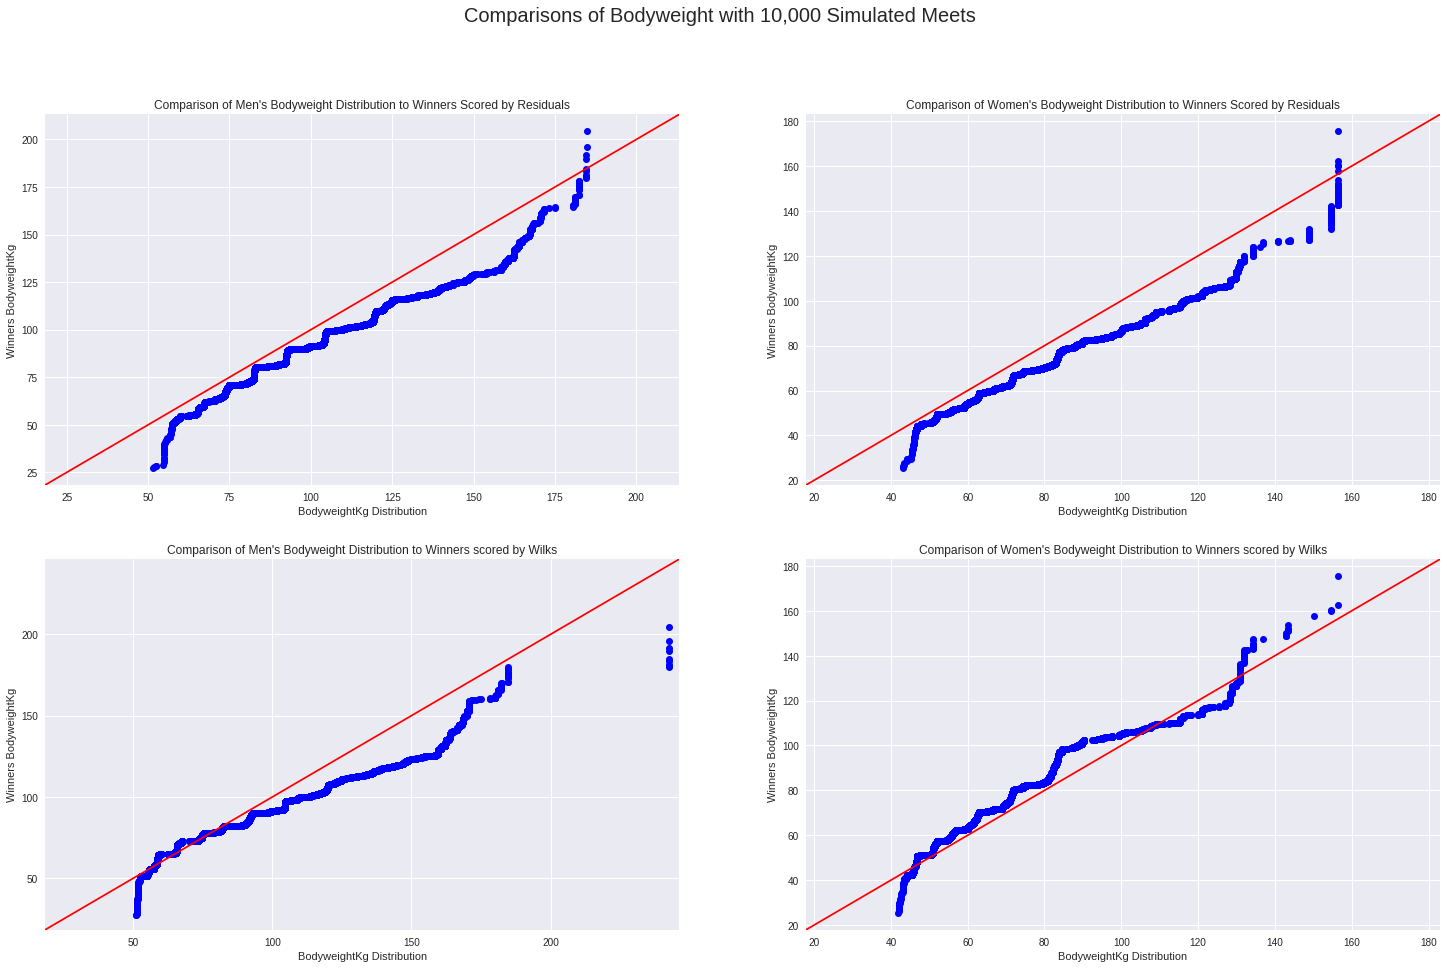

In [79]:
# plot data
from statsmodels.graphics.gofplots import qqplot_2samples

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,15))
fig.suptitle ('Comparisons of Bodyweight with 10,000 Simulated Meets', fontsize=20)


qqplot_2samples(men_sample['BodyweightKg'], best_lifter_df_m['BodyweightKg'],\
                xlabel='BodyweightKg Distribution', ylabel='Winners BodyweightKg', line='45', ax=axes[0][0])
axes[0][0].set_title("Comparison of Men's Bodyweight Distribution to Winners Scored by Residuals")

qqplot_2samples(women_sample['BodyweightKg'], best_lifter_df_w['BodyweightKg'],\
                xlabel='BodyweightKg Distribution', ylabel='Winners BodyweightKg', line='45', ax=axes[0][1])
axes[0][1].set_title("Comparison of Women's Bodyweight Distribution to Winners Scored by Residuals")


qqplot_2samples(men_sample['BodyweightKg'], best_lifter_df_m_wilks['BodyweightKg'],\
                xlabel='BodyweightKg Distribution', ylabel='Winners BodyweightKg', line='45', ax=axes[1][0])
axes[1][0].set_title("Comparison of Men's Bodyweight Distribution to Winners scored by Wilks")

qqplot_2samples(women_sample['BodyweightKg'], best_lifter_df_w_wilks['BodyweightKg'],\
                xlabel='BodyweightKg Distribution', ylabel='Winners BodyweightKg', line='45', ax=axes[1][1])
axes[1][1].set_title("Comparison of Women's Bodyweight Distribution to Winners scored by Wilks")

plt.show()

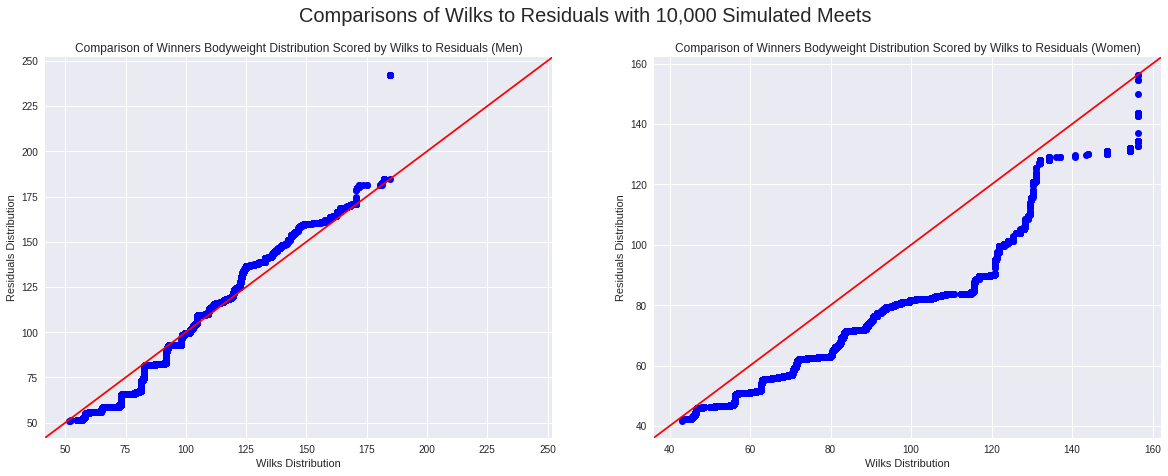

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
fig.suptitle ('Comparisons of Wilks to Residuals with 10,000 Simulated Meets', fontsize=20)
qqplot_2samples(best_lifter_df_m_wilks['BodyweightKg'], best_lifter_df_m['BodyweightKg'],\
                xlabel='Wilks Distribution', ylabel='Residuals Distribution', line='45', ax=axes[0])
axes[0].set_title("Comparison of Winners Bodyweight Distribution Scored by Wilks to Residuals (Men)")

qqplot_2samples(best_lifter_df_w_wilks['BodyweightKg'], best_lifter_df_w['BodyweightKg'],\
                xlabel='Wilks Distribution', ylabel='Residuals Distribution', line='45', ax=axes[1])
axes[1].set_title("Comparison of Winners Bodyweight Distribution Scored by Wilks to Residuals (Women)")
plt.show()

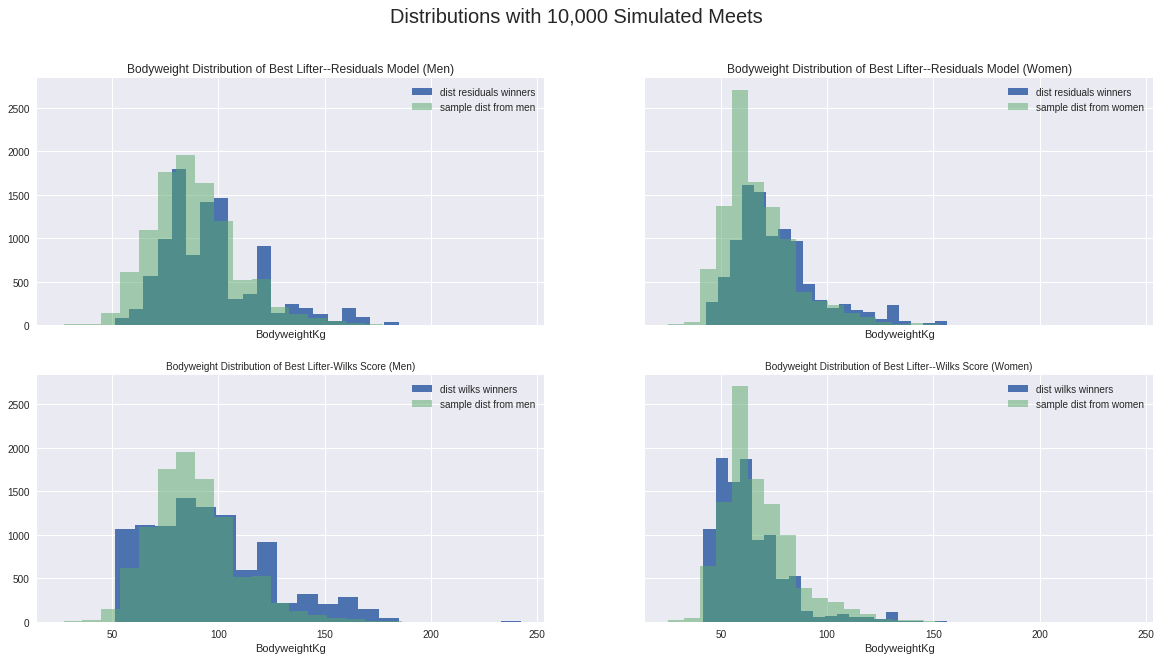

In [81]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharex=True, sharey=True)
fig.suptitle('Distributions with 10,000 Simulated Meets', fontsize=20)
a = best_lifter_df_m['BodyweightKg'].hist(ax=axes[0][0], bins=20, label='dist residuals winners')
a = men_sample['BodyweightKg'].hist(ax=axes[0][0], bins=20, label='sample dist from men', alpha=.5)
a.legend()
axes[0][0].set_xlabel('BodyweightKg')
axes[0][0].set_title('Bodyweight Distribution of Best Lifter--Residuals Model (Men)')

b = best_lifter_df_w['BodyweightKg'].hist(ax=axes[0][1], bins=20, label='dist residuals winners')
b = women_sample['BodyweightKg'].hist(ax=axes[0][1], bins=20, label='sample dist from women', alpha=.5)
b.legend()
axes[0][1].set_xlabel('BodyweightKg')
axes[0][1].set_title('Bodyweight Distribution of Best Lifter--Residuals Model (Women)')

c = best_lifter_df_m_wilks['BodyweightKg'].hist(bins= 20, ax=axes[1][0], label='dist wilks winners')
c = men_sample['BodyweightKg'].hist(bins= 20, ax=axes[1][0], alpha=.5, label='sample dist from men')
c.legend()
axes[1][0].set_xlabel('BodyweightKg')
axes[1][0].set_title('Bodyweight Distribution of Best Lifter-Wilks Score (Men)', fontsize=10)

d = best_lifter_df_w_wilks['BodyweightKg'].hist(bins= 20, ax=axes[1][1], label='dist wilks winners')
d = women_sample['BodyweightKg'].hist(bins= 20, ax=axes[1][1], label='sample dist from women', alpha=.5)
d.legend()
axes[1][1].set_xlabel('BodyweightKg')
axes[1][1].set_title('Bodyweight Distribution of Best Lifter--Wilks Score (Women)', fontsize=10)


plt.show()

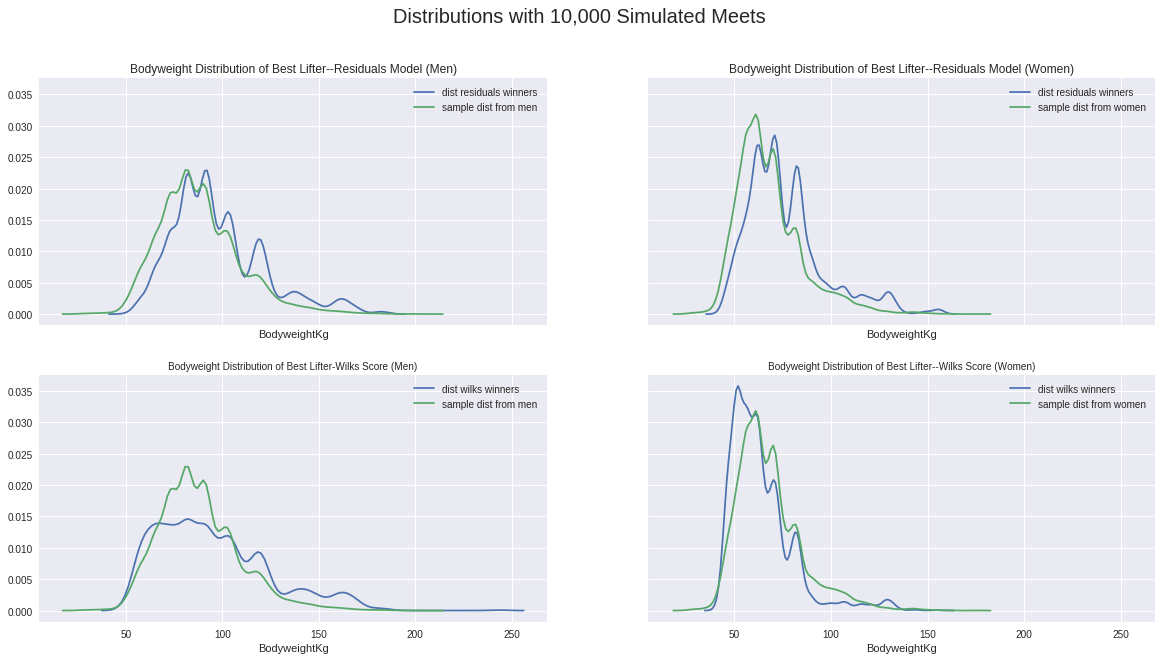

In [82]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharex=True, sharey=True)
fig.suptitle('Distributions with 10,000 Simulated Meets', fontsize=20)
a = sns.distplot(best_lifter_df_m['BodyweightKg'], ax=axes[0][0], hist=False, bins=20, label='dist residuals winners')
a = sns.distplot(men_sample['BodyweightKg'], ax=axes[0][0], hist=False, bins=20, label='sample dist from men')
a.legend()
axes[0][0].set_xlabel('BodyweightKg')
axes[0][0].set_title('Bodyweight Distribution of Best Lifter--Residuals Model (Men)')

b = sns.distplot(best_lifter_df_w['BodyweightKg'], ax=axes[0][1], hist=False, bins=20, label='dist residuals winners')
b = sns.distplot(women_sample['BodyweightKg'], ax=axes[0][1], hist=False, bins=20, label='sample dist from women')
b.legend()
axes[0][1].set_xlabel('BodyweightKg')
axes[0][1].set_title('Bodyweight Distribution of Best Lifter--Residuals Model (Women)')

c = sns.distplot(best_lifter_df_m_wilks['BodyweightKg'], ax=axes[1][0], hist=False, bins=20, label='dist wilks winners')
c = sns.distplot(men_sample['BodyweightKg'], ax=axes[1][0], hist=False, bins=20, label='sample dist from men')
c.legend()
axes[1][0].set_xlabel('BodyweightKg')
axes[1][0].set_title('Bodyweight Distribution of Best Lifter-Wilks Score (Men)', fontsize=10)

d = sns.distplot(best_lifter_df_w_wilks['BodyweightKg'], ax=axes[1][1], hist=False, bins=20, label='dist wilks winners')
d = sns.distplot(women_sample['BodyweightKg'], ax=axes[1][1], hist=False, bins=20, label='sample dist from women')
d.legend()
axes[1][1].set_xlabel('BodyweightKg')
axes[1][1].set_title('Bodyweight Distribution of Best Lifter--Wilks Score (Women)', fontsize=10)


plt.show()

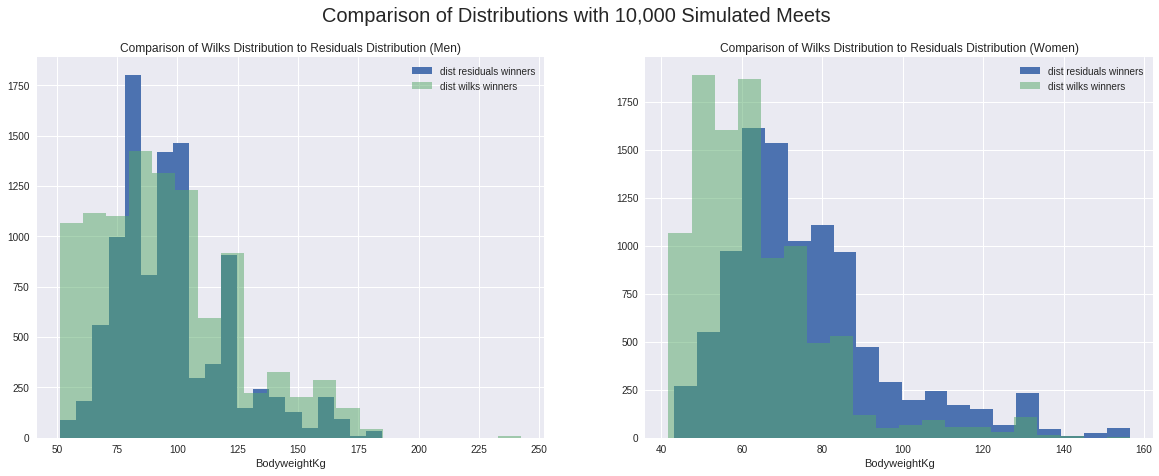

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
fig.suptitle ('Comparison of Distributions with 10,000 Simulated Meets', fontsize=20)
a = best_lifter_df_m['BodyweightKg'].hist(ax=axes[0], bins=20, label='dist residuals winners')
a = best_lifter_df_m_wilks['BodyweightKg'].hist(ax=axes[0], bins=20, label='dist wilks winners', alpha=.5)
a.legend()
axes[0].set_xlabel('BodyweightKg')
axes[0].set_title('Comparison of Wilks Distribution to Residuals Distribution (Men)')

b = best_lifter_df_w['BodyweightKg'].hist(ax=axes[1], bins=20, label='dist residuals winners')
b = best_lifter_df_w_wilks['BodyweightKg'].hist(ax=axes[1], bins=20, label='dist wilks winners', alpha=.5)
b.legend()
axes[1].set_xlabel('BodyweightKg')
axes[1].set_title('Comparison of Wilks Distribution to Residuals Distribution (Women)')
plt.show()

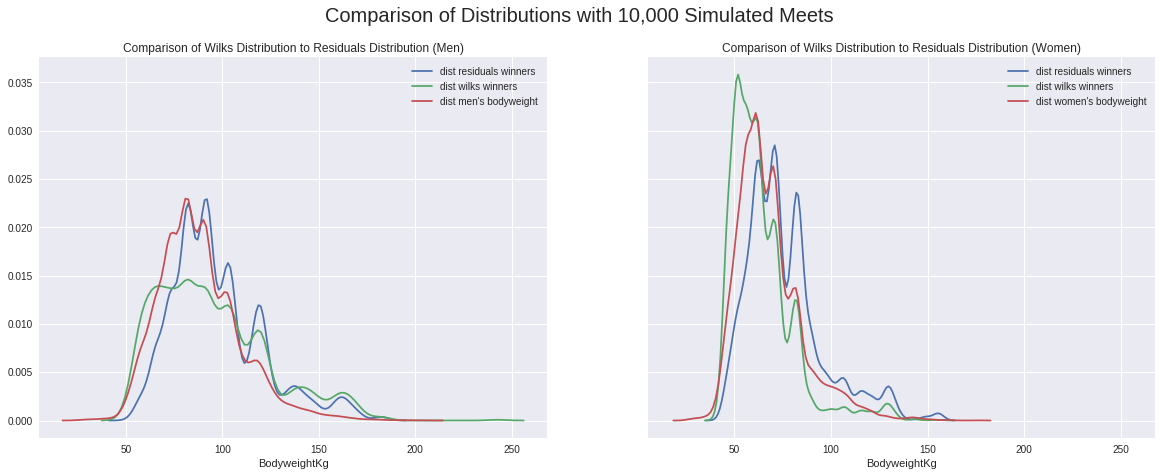

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7), sharex=True, sharey=True)
fig.suptitle ('Comparison of Distributions with 10,000 Simulated Meets', fontsize=20)
a = sns.distplot(best_lifter_df_m['BodyweightKg'], ax=axes[0], bins=20, hist=False, label='dist residuals winners')
a = sns.distplot(best_lifter_df_m_wilks['BodyweightKg'], ax=axes[0], bins=20, hist=False, label='dist wilks winners')
a = sns.distplot(men_sample['BodyweightKg'], ax=axes[0], bins=20, hist=False, label="dist men's bodyweight")
a.legend()
axes[0].set_xlabel('BodyweightKg')
axes[0].set_title('Comparison of Wilks Distribution to Residuals Distribution (Men)')

b = sns.distplot(best_lifter_df_w['BodyweightKg'], ax=axes[1], bins=20, hist=False, label='dist residuals winners')
b = sns.distplot(best_lifter_df_w_wilks['BodyweightKg'], ax=axes[1], bins=20, hist=False, label='dist wilks winners')
b = sns.distplot(women_sample['BodyweightKg'], ax=axes[1], bins=20, hist=False, label="dist women's bodyweight")
b.legend()
axes[1].set_xlabel('BodyweightKg')
axes[1].set_title('Comparison of Wilks Distribution to Residuals Distribution (Women)')
plt.show()

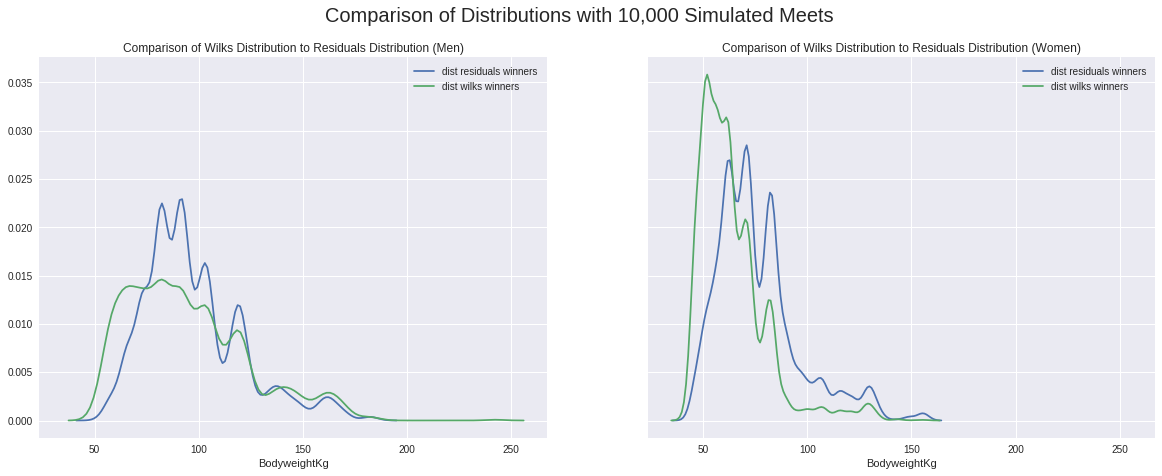

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7), sharex=True, sharey=True)
fig.suptitle ('Comparison of Distributions with 10,000 Simulated Meets', fontsize=20)
a = sns.distplot(best_lifter_df_m['BodyweightKg'], ax=axes[0], bins=20, hist=False, label='dist residuals winners')
a = sns.distplot(best_lifter_df_m_wilks['BodyweightKg'], ax=axes[0], bins=20, hist=False, label='dist wilks winners')

a.legend()
axes[0].set_xlabel('BodyweightKg')
axes[0].set_title('Comparison of Wilks Distribution to Residuals Distribution (Men)')

b = sns.distplot(best_lifter_df_w['BodyweightKg'], ax=axes[1], bins=20, hist=False, label='dist residuals winners')
b = sns.distplot(best_lifter_df_w_wilks['BodyweightKg'], ax=axes[1], bins=20, hist=False, label='dist wilks winners')

b.legend()
axes[1].set_xlabel('BodyweightKg')
axes[1].set_title('Comparison of Wilks Distribution to Residuals Distribution (Women)')
plt.show()

In [86]:
from scipy.stats import ks_2samp

display(ks_2samp(best_lifter_df_m['BodyweightKg'], men_sample['BodyweightKg']))
display(ks_2samp(best_lifter_df_w['BodyweightKg'], women_sample['BodyweightKg']))
display(ks_2samp(best_lifter_df_m_wilks['BodyweightKg'], men_sample['BodyweightKg']))
display(ks_2samp(best_lifter_df_w_wilks['BodyweightKg'], women_sample['BodyweightKg']))

Ks_2sampResult(statistic=0.18330000000000002, pvalue=7.5995975955334389e-147)

Ks_2sampResult(statistic=0.2077, pvalue=2.0173655709477866e-188)

Ks_2sampResult(statistic=0.14929999999999999, pvalue=1.450589968473575e-97)

Ks_2sampResult(statistic=0.1512, pvalue=4.7141982132629099e-100)

In [87]:
display(best_lifter_df_w.groupby('Equipment').count())
display(best_lifter_df_w_wilks.groupby('Equipment').count())
display(women.sample(10000).groupby('Equipment').count()[['Age','BodyweightKg', 'TotalKg', 'calcWilks', 'residuals']])

,Age,BodyweightKg,TotalKg,Wilks,residual
Equipment,,,,,
Raw,3689,3689,3689,3689,3689
Single-ply,6311,6311,6311,6311,6311


,Age,BodyweightKg,TotalKg,Wilks,residual
Equipment,,,,,
Raw,755,755,755,755,755
Single-ply,9245,9245,9245,9245,9245


,Age,BodyweightKg,TotalKg,calcWilks,residuals
Equipment,,,,,
Raw,6805,6805,6805,6805,6805
Single-ply,3195,3195,3195,3195,3195


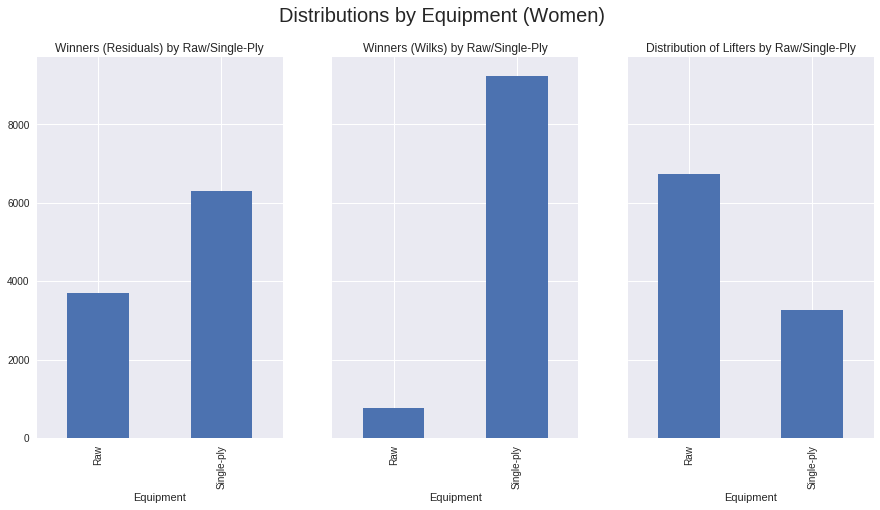

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), sharey=True)
fig.suptitle('Distributions by Equipment (Women)', fontsize=20)
best_lifter_df_w.groupby('Equipment').count()['Age'].plot(kind='bar', ax=axes[0], title='Winners (Residuals) by Raw/Single-Ply')
best_lifter_df_w_wilks.groupby('Equipment').count()['Age'].plot(kind='bar', ax=axes[1], title='Winners (Wilks) by Raw/Single-Ply')
women_sample.groupby('Equipment').count()['Age'].plot(kind='bar', ax=axes[2], title='Distribution of Lifters by Raw/Single-Ply')
plt.show()

In [90]:
display(best_lifter_df_m.groupby('Equipment').count()[['Age','BodyweightKg', 'TotalKg', 'Wilks', 'residual']])
display(best_lifter_df_m_wilks.groupby('Equipment').count()[['Age','BodyweightKg', 'TotalKg', 'Wilks', 'residual']])
display(men_sample.groupby('Equipment').count()[['Age','BodyweightKg', 'TotalKg', 'calcWilks', 'residuals']])

,Age,BodyweightKg,TotalKg,Wilks,residual
Equipment,,,,,
Raw,4695,4695,4695,4695,4695
Single-ply,5305,5305,5305,5305,5305


,Age,BodyweightKg,TotalKg,Wilks,residual
Equipment,,,,,
Raw,1079,1079,1079,1079,1079
Single-ply,8921,8921,8921,8921,8921


,Age,BodyweightKg,TotalKg,calcWilks,residuals
Equipment,,,,,
Raw,7269,7269,7269,7269,7269
Single-ply,2731,2731,2731,2731,2731


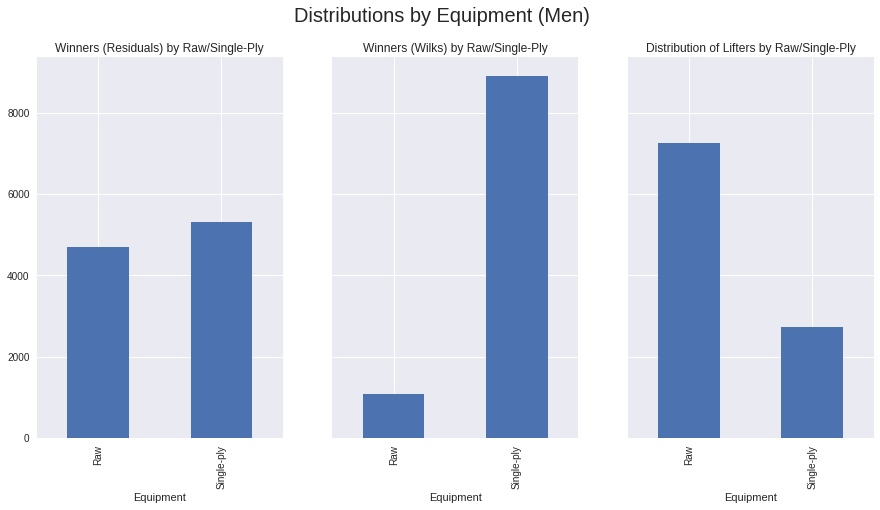

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), sharey=True)
fig.suptitle('Distributions by Equipment (Men)', fontsize=20)
best_lifter_df_m.groupby('Equipment').count()['Age'].plot(kind='bar', ax=axes[0], title='Winners (Residuals) by Raw/Single-Ply')
best_lifter_df_m_wilks.groupby('Equipment').count()['Age'].plot(kind='bar', ax=axes[1], title='Winners (Wilks) by Raw/Single-Ply')
men_sample.groupby('Equipment').count()['Age'].plot(kind='bar', ax=axes[2], title='Distribution of Lifters by Raw/Single-Ply')
plt.show()

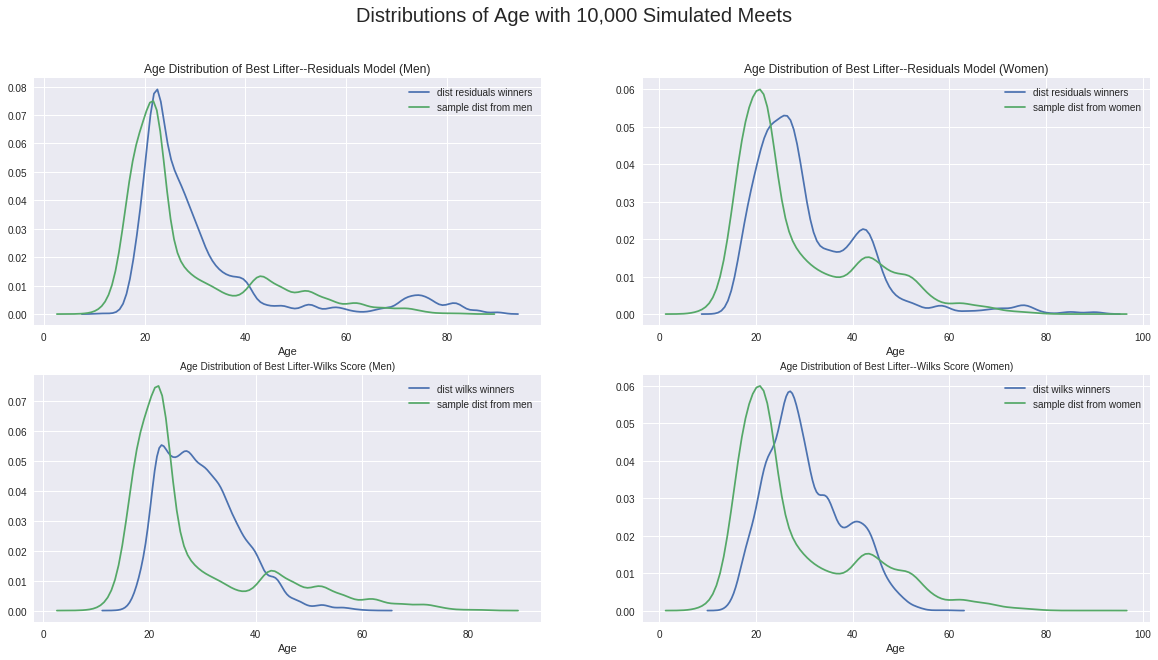

In [92]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.suptitle('Distributions of Age with 10,000 Simulated Meets', fontsize=20)
a = sns.distplot(best_lifter_df_m['Age'], ax=axes[0][0], hist=False, bins=20, label='dist residuals winners')
a = sns.distplot(men_sample['Age'], ax=axes[0][0], hist=False, bins=20, label='sample dist from men')
a.legend()
axes[0][0].set_xlabel('Age')
axes[0][0].set_title('Age Distribution of Best Lifter--Residuals Model (Men)')

b = sns.distplot(best_lifter_df_w['Age'], ax=axes[0][1], hist=False, bins=20, label='dist residuals winners')
b = sns.distplot(women_sample['Age'], ax=axes[0][1], hist=False, bins=20, label='sample dist from women')
b.legend()
axes[0][1].set_xlabel('Age')
axes[0][1].set_title('Age Distribution of Best Lifter--Residuals Model (Women)')

c = sns.distplot(best_lifter_df_m_wilks['Age'], ax=axes[1][0], hist=False, bins=20, label='dist wilks winners')
c = sns.distplot(men_sample['Age'], ax=axes[1][0], hist=False, bins=20, label='sample dist from men')
c.legend()
axes[1][0].set_xlabel('Age')
axes[1][0].set_title('Age Distribution of Best Lifter-Wilks Score (Men)', fontsize=10)

d = sns.distplot(best_lifter_df_w_wilks['Age'], ax=axes[1][1], hist=False, bins=20, label='dist wilks winners')
d = sns.distplot(women_sample['Age'], ax=axes[1][1], hist=False, bins=20, label='sample dist from women')
d.legend()
axes[1][1].set_xlabel('Age')
axes[1][1].set_title('Age Distribution of Best Lifter--Wilks Score (Women)', fontsize=10)


plt.show()

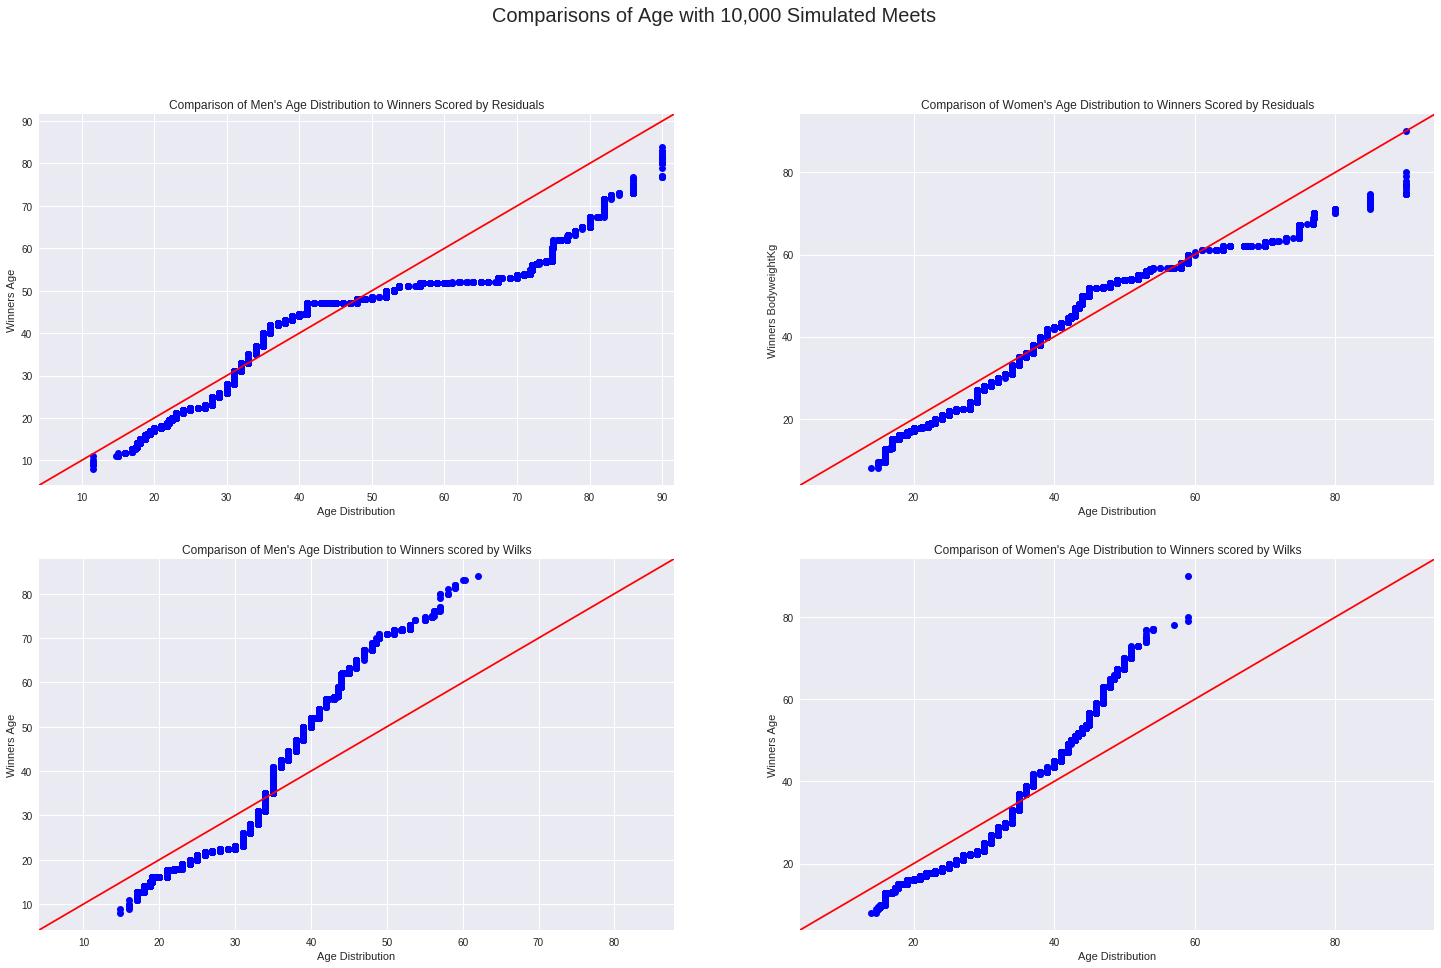

In [93]:
# plot data
from statsmodels.graphics.gofplots import qqplot_2samples

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,15))
fig.suptitle ('Comparisons of Age with 10,000 Simulated Meets', fontsize=20)


qqplot_2samples(men_sample['Age'], best_lifter_df_m['Age'],\
                xlabel='Age Distribution', ylabel='Winners Age', line='45', ax=axes[0][0])
axes[0][0].set_title("Comparison of Men's Age Distribution to Winners Scored by Residuals")

qqplot_2samples(women_sample['Age'], best_lifter_df_w['Age'],\
                xlabel='Age Distribution', ylabel='Winners BodyweightKg', line='45', ax=axes[0][1])
axes[0][1].set_title("Comparison of Women's Age Distribution to Winners Scored by Residuals")


qqplot_2samples(men_sample['Age'], best_lifter_df_m_wilks['Age'],\
                xlabel='Age Distribution', ylabel='Winners Age', line='45', ax=axes[1][0])
axes[1][0].set_title("Comparison of Men's Age Distribution to Winners scored by Wilks")

qqplot_2samples(women_sample['Age'], best_lifter_df_w_wilks['Age'],\
                xlabel='Age Distribution', ylabel='Winners Age', line='45', ax=axes[1][1])
axes[1][1].set_title("Comparison of Women's Age Distribution to Winners scored by Wilks")

plt.show()

In [94]:
display(ks_2samp(best_lifter_df_m['BodyweightKg'], men_sample['Age']))
display(ks_2samp(best_lifter_df_w['BodyweightKg'], women_sample['Age']))
display(ks_2samp(best_lifter_df_m_wilks['BodyweightKg'], men_sample['Age']))
display(ks_2samp(best_lifter_df_w_wilks['BodyweightKg'], women_sample['Age']))

Ks_2sampResult(statistic=0.95350000000000001, pvalue=0.0)

Ks_2sampResult(statistic=0.88140000000000007, pvalue=0.0)

Ks_2sampResult(statistic=0.92719999999999991, pvalue=0.0)

Ks_2sampResult(statistic=0.84540000000000004, pvalue=0.0)

## WHO DOES THE RESIDUALS MODEL FAVOR OVER WILKS?

In [95]:
# scale wilks scores 

best_lifter_df_m['wilks_sc'] = \
(best_lifter_df_m['Wilks'].values - best_lifter_df_m['Wilks'].mean())/best_lifter_df_m['Wilks'].std()

best_lifter_df_w['wilks_sc'] = \
(best_lifter_df_w['Wilks'].values - best_lifter_df_w['Wilks'].mean())/best_lifter_df_w['Wilks'].std()

best_lifter_df_m_wilks['wilks_sc'] = \
(best_lifter_df_m_wilks['Wilks'].values - best_lifter_df_m_wilks['Wilks'].mean())/best_lifter_df_m_wilks['Wilks'].std()

best_lifter_df_w_wilks['wilks_sc'] = \
(best_lifter_df_w_wilks['Wilks'].values - best_lifter_df_w_wilks['Wilks'].mean())/best_lifter_df_w_wilks['Wilks'].std()


# scale residual score
best_lifter_df_m['residual_sc'] = \
(best_lifter_df_m['residual'].values - best_lifter_df_m['residual'].mean())/best_lifter_df_m['residual'].std()

best_lifter_df_w['residual_sc'] = \
(best_lifter_df_w['residual'].values - best_lifter_df_w['residual'].mean())/best_lifter_df_w['residual'].std()

best_lifter_df_m_wilks['residual_sc'] = \
(best_lifter_df_m_wilks['residual'].values - best_lifter_df_m_wilks['residual'].mean())/best_lifter_df_m_wilks['residual'].std()

best_lifter_df_w_wilks['residual_sc'] = \
(best_lifter_df_w_wilks['residual'].values - best_lifter_df_w_wilks['residual'].mean())/best_lifter_df_w_wilks['residual'].std()

best_lifter_df_m['distance'] = best_lifter_df_m['wilks_sc'] - best_lifter_df_m['residual_sc']
best_lifter_df_w['distance'] = best_lifter_df_w['wilks_sc'] - best_lifter_df_w['residual_sc']
best_lifter_df_m_wilks['distance'] = best_lifter_df_m_wilks['wilks_sc'] - best_lifter_df_m_wilks['residual_sc']
best_lifter_df_w_wilks['distance'] = best_lifter_df_w_wilks['wilks_sc'] - best_lifter_df_w_wilks['residual_sc']

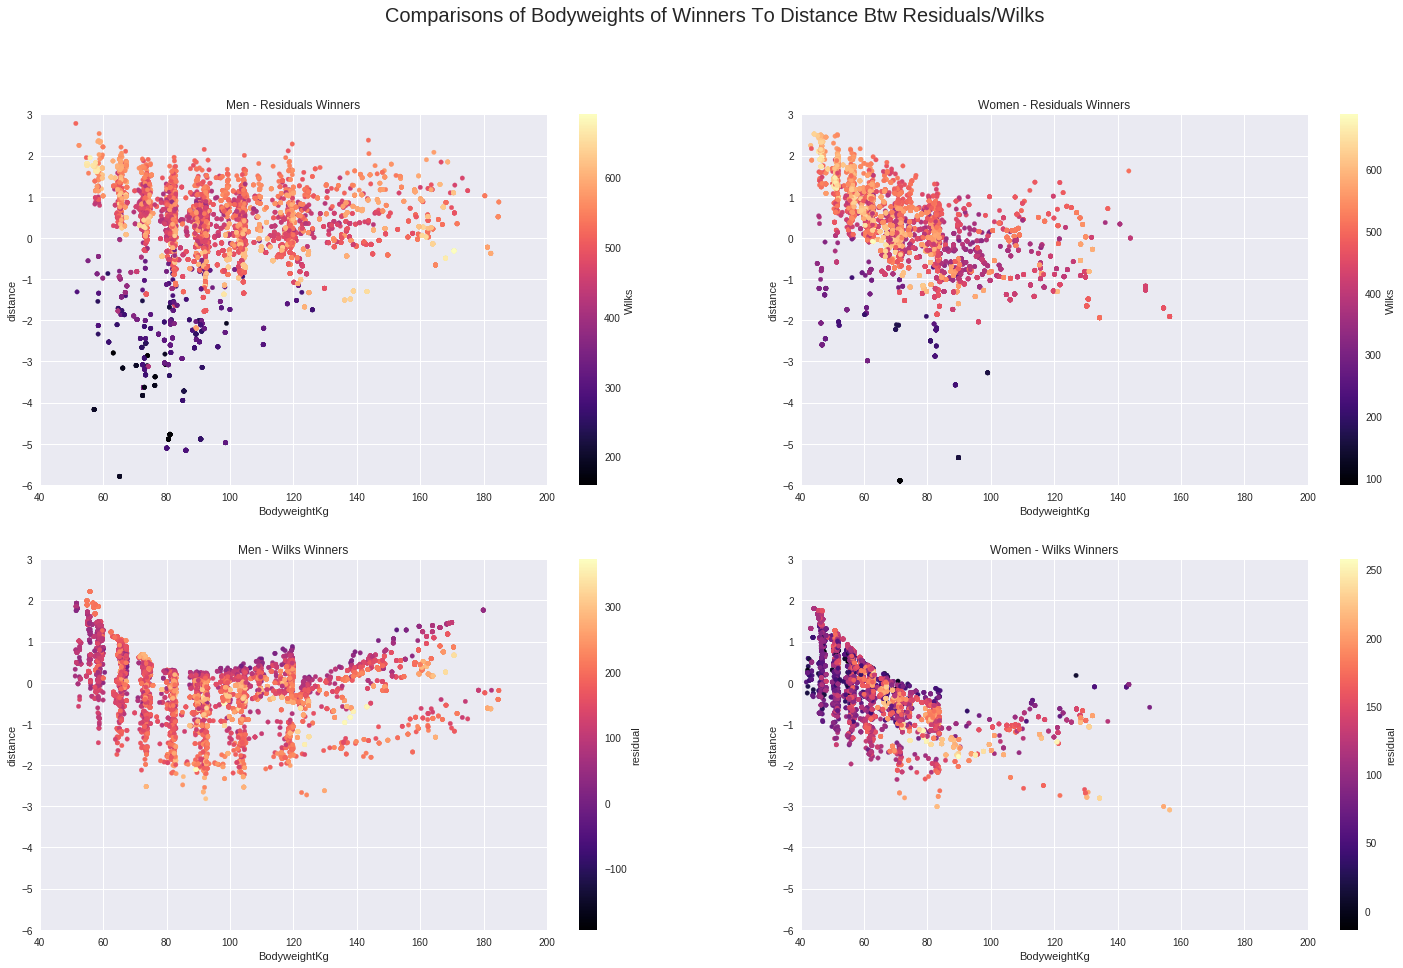

In [96]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,15))
fig.suptitle ('Comparisons of Bodyweights of Winners To Distance Btw Residuals/Wilks', fontsize=20)


a = best_lifter_df_m.plot('BodyweightKg', 'distance', kind='scatter', ax=axes[0][0], c='Wilks', cmap='magma', \
                         xlim = (40, 200), ylim=(-6, 3))
a.set_title('Men - Residuals Winners')

b = best_lifter_df_w.plot('BodyweightKg', 'distance', kind='scatter', ax=axes[0][1], c='Wilks', cmap='magma', \
                          xlim = (40, 200), ylim=(-6, 3))
b.set_title('Women - Residuals Winners')


c = best_lifter_df_m_wilks.plot('BodyweightKg', 'distance',kind='scatter', ax=axes[1][0], c='residual', cmap='magma', \
                                xlim = (40, 200), ylim=(-6, 3))
c.set_title('Men - Wilks Winners')


d = best_lifter_df_w_wilks.plot('BodyweightKg', 'distance', kind='scatter', ax=axes[1][1], c='residual', cmap='magma', \
                                xlim = (40, 200), ylim=(-6, 3))
d.set_title('Women - Wilks Winners')



plt.show()

# Compare correlation of residuals to correlation of wilks

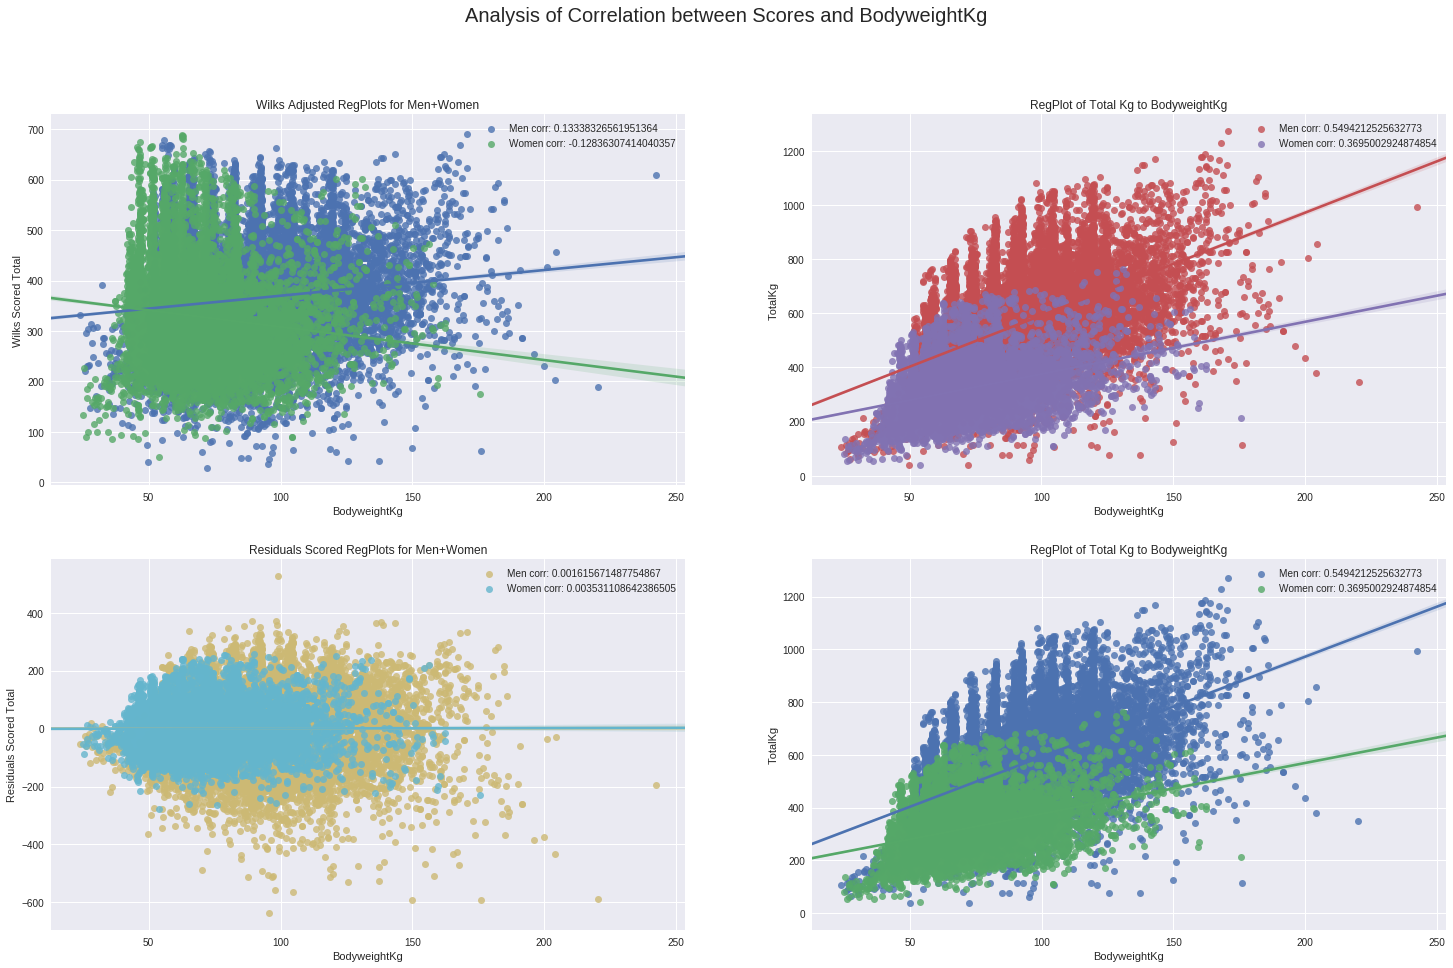

In [97]:
# create data to plot
x = men.BodyweightKg
y = men.calcWilks

w = women.BodyweightKg
t = women.calcWilks

xa = men.BodyweightKg
ya = men.TotalKg

wa = women.BodyweightKg
ta = women.TotalKg 

xb = men.BodyweightKg
yb = men.residuals

wb = women.BodyweightKg
tb = women.residuals


# get correlations 
cor1m = np.corrcoef(x, y)[0][1]
cor1w = np.corrcoef(w, t)[0][1]
cor2m = np.corrcoef(xa, ya)[0][1]
cor2w = np.corrcoef(wa, ta)[0][1]
cor3m = np.corrcoef(xb, yb)[0][1]
cor3w = np.corrcoef(wb, tb)[0][1]

# plot data

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,15))
plt.suptitle('Analysis of Correlation between Scores and BodyweightKg', fontsize=(20))

sns.regplot(x, y, ax=axes[0][0], label='Men corr: {}'.format(cor1m))
sns.regplot(w, t, ax=axes[0][0], label='Women corr: {}'.format(cor1w))
axes[0][0].legend()
axes[0][0].set_ylabel("Wilks Scored Total")
axes[0][0].set_title('Wilks Adjusted RegPlots for Men+Women')

sns.regplot(xa, ya, ax=axes[0][1], label='Men corr: {}'.format(cor2m))
sns.regplot(wa, ta, ax=axes[0][1], label='Women corr: {}'.format(cor2w))
axes[0][1].legend()
axes[0][1].set_title('RegPlot of Total Kg to BodyweightKg')

sns.regplot(xb, yb, ax=axes[1][0], label='Men corr: {}'.format(cor3m))
sns.regplot(wb, tb, ax=axes[1][0], label='Women corr: {}'.format(cor3w))
axes[1][0].legend()
axes[1][0].set_ylabel("Residuals Scored Total")
axes[1][0].set_title('Residuals Scored RegPlots for Men+Women')

sns.regplot(xa, ya, ax=axes[1][1], label='Men corr: {}'.format(cor2m))
sns.regplot(wa, ta, ax=axes[1][1], label='Women corr: {}'.format(cor2w))
axes[1][1].legend()
axes[1][1].set_title('RegPlot of Total Kg to BodyweightKg')

plt.show()